<a href="https://colab.research.google.com/github/alinesm/Attrition_Study/blob/main/Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.xlsx to Dataset (1).xlsx


In [4]:
import io
import pandas as pd

In [5]:
dataset = pd.read_excel(io.BytesIO(uploaded['Dataset.xlsx']))
dataset

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]

In [ ]:
!pip install pycaret

In [7]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [8]:
dataset.shape

(1470, 35)

In [9]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1396, 35)
Unseen Data For Predictions: (74, 35)


In [10]:
from pycaret.classification import *

In [11]:
#limpeza do dataset. Ajuste dos tipos de variável e remoção de variáveis desnecessárias
environment = setup(data = data, target = 'Attrition', session_id=1, numeric_features = ['NumCompaniesWorked', 'PercentSalaryHike','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], ignore_features = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

Description             Value
0                               session_id                 1
1                                   Target         Attrition
2                              Target Type            Binary
3                            Label Encoded     No: 0, Yes: 1
4                            Original Data        (1396, 35)
5                           Missing Values             False
6                         Numeric Features                14
7                     Categorical Features                16
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (977, 75)
12                    Transformed Test Set         (419, 75)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6513
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [34]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.8864  0.8489  0.4650  0.7150   
ada                  Ada Boost Classifier    0.8813  0.8169  0.4517  0.6693   
ridge                    Ridge Classifier    0.8762  0.0000  0.2788  0.8100   
lr                    Logistic Regression    0.8680  0.7955  0.2779  0.7314   
et                 Extra Trees Classifier    0.8670  0.8232  0.1721  0.8250   
gbc          Gradient Boosting Classifier    0.8639  0.8154  0.2912  0.6474   
rf               Random Forest Classifier    0.8628  0.8183  0.1458  0.7967   
lightgbm  Light Gradient Boosting Machine    0.8618  0.8323  0.2650  0.6548   
knn                K Neighbors Classifier    0.8301  0.5893  0.0729  0.3017   
svm                   SVM - Linear Kernel    0.7992  0.0000  0.0983  0.0394   
dt               Decision Tree Classifier    0.7954  0.6110  0.3442  0.3421   
nb                            Naive Bayes    0.7186  0.7796  0.6967  0.3163   
qda       Quadratic Discriminant Analysis    0.6488  0.4813  0.2388  0.1392   

              F1   Kappa     MCC  TT (Sec)  
lda       0.5547  0.4942  0.5135     0.029  
ada       0.5340  0.4703  0.4846     0.159  
ridge     0.4072  0.3562  0.4233     0.017  
lr        0.3856  0.3290  0.3826     0.404  
et        0.2827  0.2439  0.3371     0.517  
gbc       0.3884  0.3263  0.3647     0.339  
rf        0.2434  0.2077  0.3008     0.557  
lightgbm  0.3678  0.3062  0.3503     0.138  
knn       0.1166  0.0598  0.0791     0.123  
svm       0.0535  0.0139  0.0191     0.026  
dt        0.3396  0.2199  0.2215     0.028  
nb        0.4342  0.2813  0.3204     0.019  
qda       0.1712 -0.0269 -0.0291     0.027

Accuracy(Acurácia): indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;

In [36]:
lda = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8562  0.4000  0.5455  0.4615  0.3814  0.3875
1       0.8571  0.7791  0.5333  0.5333  0.5333  0.4490  0.4490
2       0.8980  0.8691  0.5333  0.7273  0.6154  0.5582  0.5671
3       0.8980  0.8643  0.4667  0.7778  0.5833  0.5293  0.5518
4       0.8878  0.8940  0.4000  0.7500  0.5217  0.4647  0.4943
5       0.8980  0.9382  0.4000  0.8571  0.5455  0.4964  0.5424
6       0.8571  0.7561  0.2500  0.6667  0.3636  0.3014  0.3478
7       0.9278  0.8098  0.6000  0.9000  0.7200  0.6805  0.6989
8       0.8866  0.7927  0.4667  0.7000  0.5600  0.4979  0.5114
9       0.8969  0.9293  0.6000  0.6923  0.6429  0.5830  0.5850
Mean    0.8864  0.8489  0.4650  0.7150  0.5547  0.4942  0.5135
SD      0.0219  0.0594  0.1023  0.1116  0.0930  0.1004  0.0962

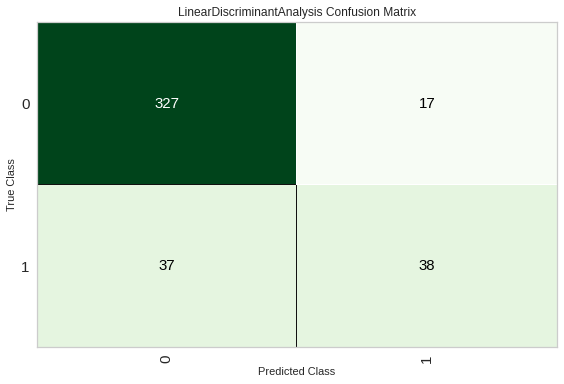

In [74]:
plot_model(lda, plot = 'confusion_matrix')

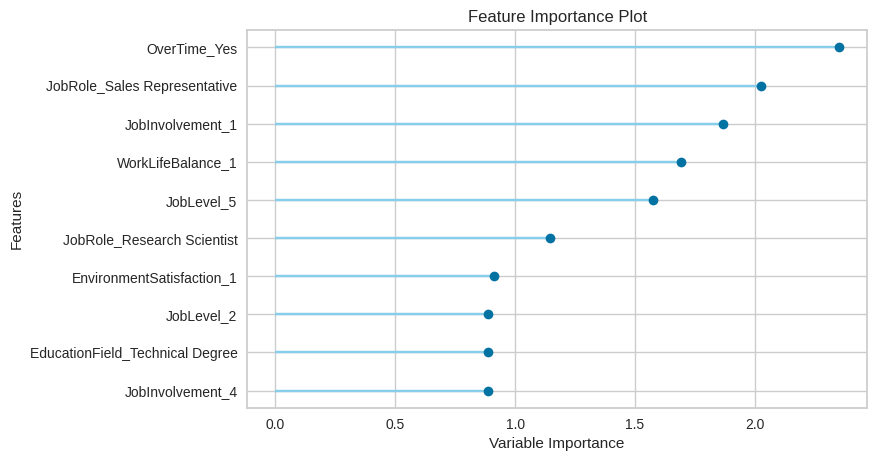

In [69]:
plot_model(lda, plot='feature')

In [75]:
final_lda = finalize_model(lda)

In [82]:
final_validation_unseen_data = predict_model(final_lda, data=data_unseen)
final_validation_unseen_data.head(10)

Age Attrition     BusinessTravel  ...  YearsWithCurrManager Label   Score
0   32        No  Travel_Frequently  ...                     6    No  0.8990
1   22        No         Non-Travel  ...                     0    No  0.8427
2   46        No  Travel_Frequently  ...                     8    No  0.5859
3   23        No      Travel_Rarely  ...                     0    No  0.6490
4   46       Yes      Travel_Rarely  ...                     7    No  0.9874
5   28        No         Non-Travel  ...                     4    No  0.9781
6   56       Yes      Travel_Rarely  ...                     3    No  0.7163
7   31       Yes      Travel_Rarely  ...                     2   Yes  0.6111
8   33        No      Travel_Rarely  ...                     2    No  0.9312
9   49        No         Non-Travel  ...                     7    No  0.9894

[10 rows x 37 columns]

In [80]:
from pycaret.utils import check_metric
check_metric(final_validation_unseen_data['Attrition'], final_validation_unseen_data['Label'], metric = 'Accuracy')

0.9054